#### Tips of using this notebook:

- Try to solve the problem yourself first with the help of ChatGPT.
- Then check the reference code and the example prompt. The example prompt will be given in the slides.
- Always check the reliability of the generated answers and be responsible for them.

# Exercise 1: A* Search on a grid graph

This is a 3 * 3 grid graph. The weight of each edge represents the cost moving from one node to another. 
Find the shortest path from (0,0) to (2,2) by A* Search. 

Requirements:
You should design a heuristic function for this problem.

Run the following code to generate the grid graph:

In [ ]:
import networkx as nx
G = nx.grid_graph(dim=[3, 3])  # nodes are two-tuples (x,y)
nx.set_edge_attributes(G, {e: e[1][0] * 2 + 1 for e in G.edges()}, "cost")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="#f86e00")
edge_labels = nx.get_edge_attributes(G, "cost")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

In [ ]:
import networkx as nx
from heapq import heappop, heappush

# Create the graph
G = nx.grid_graph(dim=[3, 3])
nx.set_edge_attributes(G, {e: e[1][0] * 2 + 1 for e in G.edges()}, "cost")

# Heuristic function using Manhattan distance
def heuristic(node, target):
    return abs(target[0] - node[0]) + abs(target[1] - node[1])

# A* algorithm to find the shortest path
def astar_search(graph, start, target):
    # Priority queue to store nodes to be explored
    queue = []
    heappush(queue, (0, start))
    
    # Dictionary to store the cost of reaching a node
    cost = {start: 0}
    
    # Dictionary to store the parent node of each node
    parent = {start: None}
    
    # A* algorithm
    while queue:
        current_cost, current_node = heappop(queue)
        
        if current_node == target:
            break
          
        for neighbor in graph.neighbors(current_node):
            new_cost = cost[current_node] + graph.edges[current_node, neighbor]['cost']
            if neighbor not in cost or new_cost < cost[neighbor]:
                cost[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, target)
                heappush(queue, (priority, neighbor))
                parent[neighbor] = current_node
    
    # Reconstruct the path from start to target
    path = []
    current_node = target
    while current_node != start:
        path.append(current_node)
        current_node = parent[current_node]
    path.append(start)
    path.reverse()
    
    return path

# Test the A* search
start = (0, 0)
target = (2, 2)
shortest_path = astar_search(G, start, target)
print("Shortest Path:", shortest_path)

# Exercise 2: 8-Puzzle Problem

- 8-Puzzle Problem
    - 3-by-3 grid (9 squares) with eight numbered tiles and one empty space.
    - Slide four adjacent (left, right, above, and below) tiles into the empty space. 
    - Objective: Rearrange the tiles so that the numbers are displayed in the goal state.
- Task: Solve the 8-Puzzle Problem using A* Search
    - Use proper representation for the 3-by-3 grid and the labels (numbers)
    - Try different heuristic functions (all heuristic functions below are admissible).
        - h1: Number of misplaced tiles
        - h2: Sum of Euclidean distances of the tiles from their goal positions
        - h3: Sum of Manhattan distances of the tiles from their goal positions
        - h4: Number of tiles out of row + Number of tiles out of column

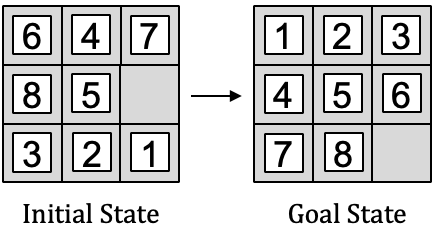

Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

In [1]:
import heapq

# Define the initial and goal states
INITIAL_STATE = ((6, 4, 7), (8, 5, '_'), (3, 2, 1))
GOAL_STATE = ((1, 2, 3), (4, 5, 6), (7, 8, '_'))

# Define the heuristic functions
def h1(state):
    # Number of misplaced tiles
    count = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != GOAL_STATE[i][j]:
                count += 1
    return count

def h2(state):
    # Sum of Euclidean distances of the tiles from their goal positions
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != '_':
                x1, y1 = i, j
                x2, y2 = divmod(state[i][j] - 1, 3)
                distance += ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return distance

def h3(state):
    # Sum of Manhattan distances of the tiles from their goal positions
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != '_':
                x1, y1 = i, j
                x2, y2 = divmod(state[i][j] - 1, 3)
                distance += abs(x1 - x2) + abs(y1 - y2)
    return distance

def h4(state):
    # Number of tiles out of row + Number of tiles out of column
    count = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != '_':
                x1, y1 = i, j
                x2, y2 = divmod(state[i][j] - 1, 3)
                count += abs(x1 - x2) + abs(y1 - y2)
    return count

# Define the Node class to represent each state
class Node:
    def __init__(self, state, g, h, parent=None):
        self.state = state
        self.g = g
        self.h = h
        self.f = g + h
        self.parent = parent

    def __lt__(self, other):
        return self.f < other.f

# Define the A* Search function
def astar_search(initial_state, goal_state, heuristic):
    # Define the movements for shifting the empty space
    movements = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    movements_text = ['right', 'left', 'down', 'up']

    # Initialize the open and closed sets
    open_set = []
    closed_set = set()
    heapq.heappush(open_set, Node(initial_state, 0, heuristic(initial_state)))

    # Initialize the number of states examined
    states_examined = 0

    while open_set:
        # Pop the node with the lowest f value from the open set
        current_node = heapq.heappop(open_set)
        current_state = current_node.state

        # Add the current state to the closed set
        closed_set.add(current_state)

        # Check if the current state is the goal state
        if current_state == goal_state:
            # Construct the path from the root node to the goal node
            path = []
            while current_node:
                path.append(current_node.state)
                current_node = current_node.parent

            # Reverse the path to get the correct order
            path.reverse()

            # Print the path
            for node in path:
                print_state(node)
                print()

            # Print the number of states examined
            print("Number of states examined:", states_examined)

            return

        # Generate the next states
        for movement, movement_text in zip(movements, movements_text):
            new_state = move(current_state, movement)
            if new_state is not None and new_state not in closed_set:
                # Calculate the cost and heuristic values for the new state
                g = current_node.g + 1
                h = heuristic(new_state)

                # Create a new node for the new state
                new_node = Node(new_state, g, h, current_node)

                # Add the new node to the open set
                heapq.heappush(open_set, new_node)

                # Increment the number of states examined
                states_examined += 1

    # If no path is found, print "No path found"
    print("No path found")

    # Print the number of states examined
    print("Number of states examined:", states_examined)

# Define the function to move the empty space
def move(state, movement):
    x, y = find_empty_space(state)
    dx, dy = movement

    # Check if the movement is valid
    if 0 <= x + dx < 3 and 0 <= y + dy < 3:
        # Create a new state by swapping the empty space with a tile
        new_state = list(map(list, state))
        new_state[x][y], new_state[x + dx][y + dy] = new_state[x + dx][y + dy], new_state[x][y]
        return tuple(map(tuple, new_state))

    return None

# Define the function to find the empty space
def find_empty_space(state):
    for i in range(3):
        for j in range(3):
            if state[i][j] == '_':
                return i, j

# Define the function to print the state
def print_state(state):
    for row in state:
        print(*row)

# Run the A* Search with the first heuristic function
print("Using heuristic function h1:")
astar_search(INITIAL_STATE, GOAL_STATE, h1)

Using heuristic function h1:
6 4 7
8 5 _
3 2 1

6 4 7
8 5 1
3 2 _

6 4 7
8 5 1
3 _ 2

6 4 7
8 5 1
_ 3 2

6 4 7
_ 5 1
8 3 2

_ 4 7
6 5 1
8 3 2

4 _ 7
6 5 1
8 3 2

4 7 _
6 5 1
8 3 2

4 7 1
6 5 _
8 3 2

4 7 1
6 _ 5
8 3 2

4 7 1
_ 6 5
8 3 2

_ 7 1
4 6 5
8 3 2

7 _ 1
4 6 5
8 3 2

7 1 _
4 6 5
8 3 2

7 1 5
4 6 _
8 3 2

7 1 5
4 6 2
8 3 _

7 1 5
4 6 2
8 _ 3

7 1 5
4 _ 2
8 6 3

7 1 5
_ 4 2
8 6 3

_ 1 5
7 4 2
8 6 3

1 _ 5
7 4 2
8 6 3

1 5 _
7 4 2
8 6 3

1 5 2
7 4 _
8 6 3

1 5 2
7 4 3
8 6 _

1 5 2
7 4 3
8 _ 6

1 5 2
7 4 3
_ 8 6

1 5 2
_ 4 3
7 8 6

1 5 2
4 _ 3
7 8 6

1 _ 2
4 5 3
7 8 6

1 2 _
4 5 3
7 8 6

1 2 3
4 5 _
7 8 6

1 2 3
4 5 6
7 8 _

Number of states examined: 221849


## Template for Lab Assignment 2:

Copy and apply the following template for Lab Assignment 2:

```
from typing import List
def solve(grid: List[List[str]]) -> int:
    """Your solution to the problem goes in this function.
    Args:
        grid (List[List[str]]): The warehouse layout, e.g., [["@", "@", "@"], ["@", "R", "$"], ["@", "@", "T"]]
    Returns:
        int: the minimum number of pushes required for the robot to move the item to an empty shelf.
    """
    # Your solution here
    return -2

# test case 1
grid1 = [["@", "@", "@", "@", "@", "@"], 
["@", "@", "@", "@", "T", "@"], 
["@", "#", "$", "#", "#", "@"], 
["@", "#", "@", "@", "#", "@"], 
["@", "R", "#", "#", "#", "@"], 
["@", "T", "@", "@", "@", "@"]]
answer1 = 3
result1 = solve(grid1)
assert result1 == answer1, f"Test case 1: expected {answer1}, got {result1}"
print('Passed test case 1...’)

# test case 2
grid2 = [["@", "T", "@", "@", "@", "@"], 
["@", "#", "@", "@", "@", "@"], 
["@", "#", "#", "#", "$", "@"], 
["@", "#", "@", "@", "@", "@"], 
["@", "R", "#", "#", "T", "@"], 
["@", "@", "@", "@", "@", "@"]]
answer2 = -1
result2 = solve(grid2)
assert result2 == answer2, f"Test case 2: expected {answer2}, got {result2}"
print('Passed test case 2...') 
```